Prepared By [Izam Mohammed](https://github.com/izam-mohammed) 😊. Follow for more ❤️.

#### Greeting Strangers

In [ ]:
# basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# sklearn guys to manufacture
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# some nlp things
import gensim, nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec

# plot directly
%matplotlib inline

# I don't want creepy warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Preprocessing

#### Imputation

In [ ]:
# creating data
data = {'Student_ID': [1, 2, 3, 4, 5],
        'Math_Score': [95, 88, np.nan, 78, 90],
        'Science_Score': [88, np.nan, 76, 85, 92]}
df = pd.DataFrame(data)
df

,Student_ID,Math_Score,Science_Score
0,1,95.0,88.0
1,2,88.0,NaN
2,3,NaN,76.0
3,4,78.0,85.0
4,5,90.0,92.0


In [ ]:
# fill na / imputation

vals = {'Math_Score':df.Math_Score.mean(), 'Science_Score':df.Science_Score.mean()}  # fill each column with mean

df.fillna(vals)

,Student_ID,Math_Score,Science_Score
0,1,95.00,88.00
1,2,88.00,85.25
2,3,87.75,76.00
3,4,78.00,85.00
4,5,90.00,92.00


### Outliers and duplicates

#### Outliears with z-score

In [ ]:
# create data
data = np.array([2.0, 2.2, 2.4, 2.8, 3.0, 3.2, 3.4, 4.0, 100.0])
data

array([  2. ,   2.2,   2.4,   2.8,   3. ,   3.2,   3.4,   4. , 100. ])

In [ ]:
z_scores = np.abs(stats.zscore(data))
threshold = 2
outliers = z_scores > threshold

data[outliers]

array([100.])

found that outlier data point 100

#### Outliers with IQR

In [ ]:
data = np.array([2.0, 2.2, 2.4, 2.8, 3.0, 3.2, 3.4, 4.0, 100.0])
data

array([  2. ,   2.2,   2.4,   2.8,   3. ,   3.2,   3.4,   4. , 100. ])

In [ ]:
# finding q1, q3, iqr

q1 = np.percentile(data, 25)
q3 = np.percentile(data, 72)

iqr = q3 - q1
iqr

0.952

In [ ]:
# upper and lower

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [ ]:
# the outliears

outliers = np.where((data > upper_bound) | (data < lower_bound))
data[outliers]

array([100.])

#### Outliers with Isolation forest

In [ ]:
# the data

data = np.array([[2.0], [2.2], [2.4], [2.8], [3.0], [3.2], [3.4], [4.0], [100.0]])
data.shape

(9, 1)

In [ ]:
# isolaton model
clf = IsolationForest(contamination=0.1, random_state=42)

In [ ]:
# outliears

outliers = clf.fit_predict(data)
index_of_outlier = np.where(outliers == -1)

data[index_of_outlier]

array([[100.]])

#### Outliers with Local Ourlier Factor

In [ ]:
# data
data = np.array([[2.0], [2.2], [2.4], [2.8], [3.0], [3.2], [3.4], [4.0], [100.0]])

In [ ]:
# model
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)

In [ ]:
# outliers

outliers = clf.fit_predict(data)
data[np.where(outliers == -1)]

array([[100.]])

#### Outliear with DBSCAN

In [ ]:
# data
data = np.array([[2.0], [2.2], [2.4], [2.8], [3.0], [3.2], [3.4], [4.0], [100.0]])

#model
clf = DBSCAN(eps=1.0, min_samples=2)

# ouliers
outliers = clf.fit_predict(data)

data[np.where(outliers == -1)]


array([[100.]])

#### Remove duplicates

In [ ]:
# data
data = {'A': [1, 2, 2, 3, 4, 4],
        'B': ['apple', 'banana', 'banana', 'cherry', 'date', 'date']}

df = pd.DataFrame(data)
df

,A,B
0,1,apple
1,2,banana
2,2,banana
3,3,cherry
4,4,date
5,4,date


In [ ]:
df.drop_duplicates()

,A,B
0,1,apple
1,2,banana
3,3,cherry
4,4,date


### Encoding

#### Label Encoding

In [ ]:
# data
data = {'Color': ['Red', 'Green', 'Blue', 'Green']}
df = pd.DataFrame(data)
df

,Color
0,Red
1,Green
2,Blue
3,Green


In [ ]:
label_encoder = LabelEncoder()

# adding a new column
df['encoded_color'] = label_encoder.fit_transform(data['Color'])
df

,Color,encoded_color
0,Red,2
1,Green,1
2,Blue,0
3,Green,1


#### one hot encoding

In [ ]:
# data
df = pd.DataFrame(data)
df

,Color
0,Red
1,Green
2,Blue
3,Green


In [ ]:
# encoding
one_hot = pd.get_dummies(df, columns=['Color'])
one_hot

,Color_Blue,Color_Green,Color_Red
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0


#### ordinal encoding

In [ ]:
# data
data = {'Education_Level': ['Low', 'Medium', 'High', 'Medium']}
df = pd.DataFrame(data)
df

,Education_Level
0,Low
1,Medium
2,High
3,Medium


In [ ]:
# encoding
# with .map() to pd series

ordinal_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['encoded_ed_level'] = df.Education_Level.map(ordinal_mapping)
df

,Education_Level,encoded_ed_level
0,Low,0
1,Medium,1
2,High,2
3,Medium,1


#### Bag of words

It is nothing but count vectoriser

In [ ]:
# Sample corpus
corpus = [
    "I like apples and bananas.",
    "Bananas are my favorite fruit.",
    "I prefer apples over oranges."
]

In [ ]:
# initialise the CountVectorizer

vectorizer = CountVectorizer()

# fitting and transforming
X = vectorizer.fit_transform(corpus)

In [ ]:
# convert BoW vectors to a dense array

bow_array = X.toarray()
bow_array

array([[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]])

In [ ]:
# Get the vocabulary

vocab = vectorizer.get_feature_names_out()
vocab

array(['and', 'apples', 'are', 'bananas', 'favorite', 'fruit', 'like',
       'my', 'oranges', 'over', 'prefer'], dtype=object)

#### TF-IDF

In [ ]:
# using the same data used before
corpus

['I like apples and bananas.',
 'Bananas are my favorite fruit.',
 'I prefer apples over oranges.']

In [ ]:
# initialize
vectorizer = TfidfVectorizer()

In [ ]:
# fit and transform

X_tfidf = vectorizer.fit_transform(corpus)

# to an array
tfidf_arr = X_tfidf.toarray()
tfidf_arr

array([[0.5628291 , 0.42804604, 0.        , 0.42804604, 0.        ,
        0.        , 0.5628291 , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.46735098, 0.35543247, 0.46735098,
        0.46735098, 0.        , 0.46735098, 0.        , 0.        ,
        0.        ],
       [0.        , 0.40204024, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.52863461, 0.52863461,
        0.52863461]])

In [ ]:
# Get the vocabulary

vocab = vectorizer.get_feature_names_out()
vocab

array(['and', 'apples', 'are', 'bananas', 'favorite', 'fruit', 'like',
       'my', 'oranges', 'over', 'prefer'], dtype=object)

#### Word2vec

In [ ]:
# tokenizing

corpus1 = 'The quick brown fox jumps over the lazy dog. A brown cat meows loudly in the yard.An agile dog chases the cat through the garden.Birds chirp merrily in the trees.The sun shines brightly in the clear blue sky.Children play games in the park.People walk their dogs on the sunny days.'
corpus = '''The quick brown fox jumps over the lazy dog. The dog barks loudly.
A brown cat meows softly in the yard. The cat purrs.
The agile dog chases the cat through the garden. The dog and cat play together.
Birds chirp merrily in the trees. Birds build nests in the trees.
The sun shines brightly in the clear blue sky. The sky is blue.
Children play games in the park. The park is a favorite place for kids to play.
People walk their dogs on the sunny days. Dogs love to go for walks.
'''

sentences = sent_tokenize(corpus)
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

In [ ]:
# training the model

model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1)

In [ ]:
# get vector of a word

vector = model.wv['dog']
vector

array([-8.2422886e-03,  9.2999628e-03, -1.9712155e-04, -1.9671603e-03,
        4.6014879e-03, -4.0999772e-03,  2.7431867e-03,  6.9480427e-03,
        6.0690660e-03, -7.5164349e-03,  9.3836924e-03,  4.6655736e-03,
        3.9588800e-03, -6.2355171e-03,  8.4579838e-03, -2.1550371e-03,
        8.8255843e-03, -5.3651864e-03, -8.1268586e-03,  6.8198838e-03,
        1.6803870e-03, -2.2003648e-03,  9.5235687e-03,  9.4947461e-03,
       -9.7748255e-03,  2.5037751e-03,  6.1476049e-03,  3.8719960e-03,
        2.0223495e-03,  4.3119269e-04,  6.7575934e-04, -3.8210973e-03,
       -7.1313642e-03, -2.1049101e-03,  3.9263871e-03,  8.8185845e-03,
        9.2617534e-03, -5.9727821e-03, -9.4103348e-03,  9.7619882e-03,
        3.4248813e-03,  5.1642619e-03,  6.2764515e-03, -2.8050970e-03,
        7.3212935e-03,  2.8245989e-03,  2.8747458e-03, -2.3825620e-03,
       -3.1244315e-03, -2.3623710e-03,  4.2781825e-03,  7.1726128e-05,
       -9.5807780e-03, -9.6638547e-03, -6.1446317e-03, -1.2846364e-04,
      

In [ ]:
# find similar words

similar_words = model.wv.most_similar('cat', topn=5)
similar_words

[('sky', 0.2537281811237335),
 ('barks', 0.20068450272083282),
 ('sunny', 0.19577807188034058),
 ('fox', 0.17685823142528534),
 ('in', 0.171148881316185)]

It saying wrong because the data is very limit

### Transformation

#### Min max scaler (Normalising)

In [ ]:
# data
data = {'products': ['car', 'bike', 'lorry', 'scootter'],
        'price': [100, 402, 1993, 593]}

df = pd.DataFrame(data)
df

,products,price
0,car,100
1,bike,402
2,lorry,1993
3,scootter,593


In [ ]:
# scaling

scaler = MinMaxScaler()
df['minmax_price'] = scaler.fit_transform(df[['price']])
df

,products,price,minmax_price
0,car,100,0.000000
1,bike,402,0.159535
2,lorry,1993,1.000000
3,scootter,593,0.260433


#### Standard Scaler (z-score)

In [ ]:
# scaling
scaler = StandardScaler()
df['standaridized price'] = scaler.fit_transform(df[['price']])
df

,products,price,minmax_price,standaridized price
0,car,100,0.000000,-0.924948
1,bike,402,0.159535,-0.509272
2,lorry,1993,1.000000,1.680598
3,scootter,593,0.260433,-0.246378


#### Robust Scaler

Better when there is ouliers<br>formula --> (xi - median)/iqr

In [ ]:
# scaling

scaler = RobustScaler()

df['robust scaled'] = scaler.fit_transform(df[['price']])
df

,products,price,minmax_price,standaridized price,robust scaled
0,car,100,0.000000,-0.924948,-0.644769
1,bike,402,0.159535,-0.509272,-0.154907
2,lorry,1993,1.000000,1.680598,2.425791
3,scootter,593,0.260433,-0.246378,0.154907


#### Log transformation

use to reduce the skewness

In [ ]:
df['log transformed'] = np.log(df['price'])
df

,products,price,minmax_price,standaridized price,robust scaled,log transformed
0,car,100,0.000000,-0.924948,-0.644769,4.605170
1,bike,402,0.159535,-0.509272,-0.154907,5.996452
2,lorry,1993,1.000000,1.680598,2.425791,7.597396
3,scootter,593,0.260433,-0.246378,0.154907,6.385194


#### Max absolute scale

find the maximum absolute value and devide that with every element

In [ ]:
# scaling

scaler = MaxAbsScaler()
df['max_absolute scaler'] = scaler.fit_transform(df[['price']])
df

,products,price,minmax_price,standaridized price,robust scaled,log transformed,max_absolute scaler
0,car,100,0.000000,-0.924948,-0.644769,4.605170,0.050176
1,bike,402,0.159535,-0.509272,-0.154907,5.996452,0.201706
2,lorry,1993,1.000000,1.680598,2.425791,7.597396,1.000000
3,scootter,593,0.260433,-0.246378,0.154907,6.385194,0.297541


#### Quantile Transformation

In [ ]:
scaler =  QuantileTransformer(output_distribution='normal')
df['quantile transform'] = scaler.fit_transform(df[['price']])
df

,products,price,minmax_price,standaridized price,robust scaled,log transformed,max_absolute scaler,quantile transform
0,car,100,0.000000,-0.924948,-0.644769,4.605170,0.050176,-5.199338
1,bike,402,0.159535,-0.509272,-0.154907,5.996452,0.201706,-0.430727
2,lorry,1993,1.000000,1.680598,2.425791,7.597396,1.000000,5.199338
3,scootter,593,0.260433,-0.246378,0.154907,6.385194,0.297541,0.430727


### Binning

#### Equal width binning

In [ ]:
# data

data = {'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50]}
df = pd.DataFrame(data)
df

,Value
0,10
1,15
2,20
3,25
4,30
5,35
6,40
7,45
8,50


In [ ]:
# binning
bins = [0, 20, 40, 60]
labels = ['low', 'medium', 'high']

df['category_equal'] = pd.cut(df['Value'], bins=bins, labels=labels)
df

,Value,category_equal
0,10,low
1,15,low
2,20,low
3,25,medium
4,30,medium
5,35,medium
6,40,medium
7,45,high
8,50,high


#### Equal Frequency binning

In [ ]:
# data
print('labels')
df.head(2)

labels


,Value,category_equal
0,10,low
1,15,low


In [ ]:
# binning
df['equal freq bin'] = pd.qcut(df['Value'], q=3, labels=labels)
df[['Value', 'equal freq bin']]

,Value,equal freq bin
0,10,low
1,15,low
2,20,low
3,25,medium
4,30,medium
5,35,medium
6,40,high
7,45,high
8,50,high


#### Custom binning

In [ ]:
# binning
bins = [0, 15, 45, 60]

df['custom'] = pd.cut(df['Value'], bins=bins, labels=labels)
df[['Value', 'custom']]

,Value,custom
0,10,low
1,15,low
2,20,medium
3,25,medium
4,30,medium
5,35,medium
6,40,medium
7,45,medium
8,50,high


#### binning with kmeans

In [ ]:
# k means model
model = KMeans(n_clusters=3, random_state=0)

In [ ]:
# fitting
model.fit(df[['Value']])

KMeans(n_clusters=3, random_state=0)

In [ ]:
# binning

df['kmeans'] = model.labels_
df

,Value,category_equal,equal freq bin,custom,kmeans
0,10,low,low,low,2
1,15,low,low,low,2
2,20,low,low,medium,2
3,25,medium,medium,medium,1
4,30,medium,medium,medium,1
5,35,medium,medium,medium,1
6,40,medium,high,medium,0
7,45,high,high,medium,0
8,50,high,high,high,0


#### PCA

In [ ]:
# generating data

data = np.random.rand(100, 4) # 100 samples with 4 features

df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
df.head()

,Feature1,Feature2,Feature3,Feature4
0,0.913514,0.529895,0.444516,0.031015
1,0.797145,0.919501,0.768681,0.407926
2,0.985705,0.874345,0.794012,0.818434
3,0.753992,0.192122,0.520996,0.307312
4,0.985069,0.532050,0.844749,0.215936


In [ ]:
# scaling the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[:4]

array([[ 1.25763303,  0.19419259, -0.19800086, -1.554726  ],
       [ 0.86030341,  1.58545384,  0.88962619, -0.16729997],
       [ 1.50412335,  1.4242029 ,  0.97461546,  1.34379814],
       [ 0.71296331, -1.01197742,  0.05860326, -0.53766268]])

In [ ]:
# applying PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df

,PC1,PC2
0,-0.509072,0.548333
1,-0.891231,0.703624
2,0.421673,0.841965
3,0.529722,0.710460
4,-0.340369,1.682160
...,...,...
95,1.481193,0.563462
96,0.692345,-0.404576
97,-0.429618,-1.047384
98,-0.985163,1.413102


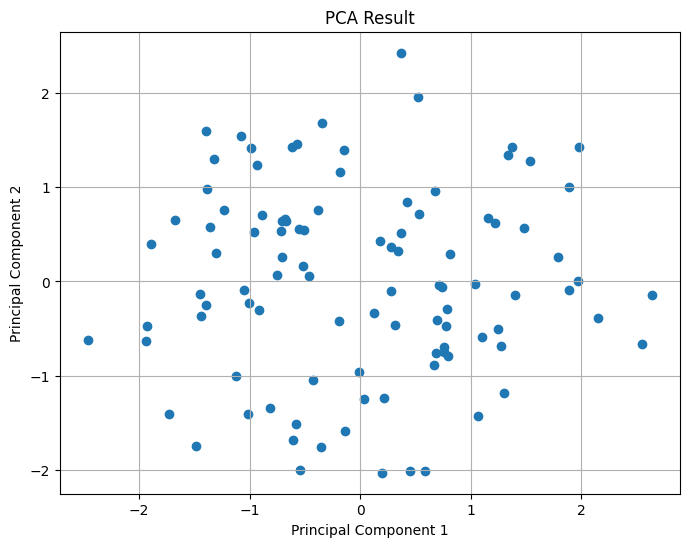

In [ ]:
# plot

plt.figure(figsize=(8, 6))
plt.scatter(df['PC1'], df['PC2'])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Evaluation matrics

#### confusion matrix

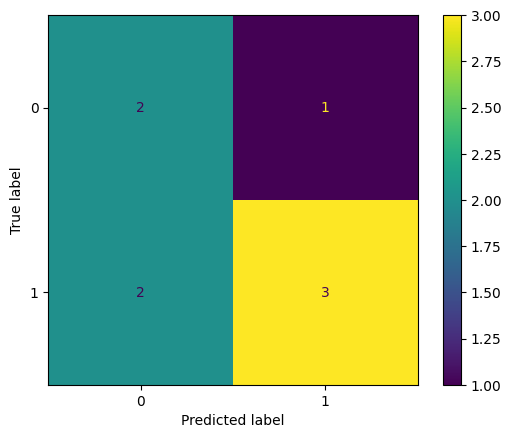

In [ ]:
# input and predicted for classification

y_true = np.array([1, 0, 1, 1, 0, 1, 0, 1])
y_pred = np.array([1, 0, 0, 1, 1, 1, 0, 0])

confusion = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
plt.show()

In [ ]:
# from scratch

true_positive = ((y_pred==1)&(y_true==y_pred)).sum()
false_positive = ((y_pred==1)&(y_true!=y_pred)).sum()
true_negative = ((y_pred==0)&(y_true==y_pred)).sum()
false_negative = ((y_pred==0)&(y_true!=y_pred)).sum()

matrix = np.array([
    [true_negative, false_positive],
    [false_negative, true_positive]
])

matrix

array([[2, 1],
       [2, 3]])

#### Accuracy

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.625

In [ ]:
# from scratch

accuracy = (true_positive+true_negative)/len(y_true)
accuracy

0.625

#### precision

In [ ]:
precision_score(y_true, y_pred)

0.75

In [ ]:
# from scratch

precision = true_positive/(true_positive+false_positive)
precision

0.75

#### recall

In [ ]:
recall_score(y_true, y_pred)

0.6

In [ ]:
# from scratch

recall = true_positive/(true_positive+false_negative)
recall

0.6

#### f1 score

It is also know as f-beta score

In [ ]:
f1_score(y_true, y_pred)

0.6666666666666665

In [ ]:
# from scratch

f1_score_val = 2*(precision*recall)/(precision+recall)
f1_score_val

0.6666666666666665

#### roc auc curve

In [ ]:
roc_auc_score(y_true, y_pred)

0.6333333333333334

#### MAE

In [ ]:
# data
y_true = np.array([20.5, 30.2, 25.0, 35.1, 28.7])
y_pred = np.array([21.2, 29.8, 24.8, 34.9, 27.9])

In [ ]:
mean_absolute_error(y_true, y_pred)

0.46000000000000013

In [ ]:
# from scratch

mae = (np.abs(y_true-y_pred)).mean()
mae

0.46000000000000013

#### MSE

In [ ]:
mean_squared_error(y_true, y_pred)

0.27399999999999997

In [ ]:
# from scratch

mse = ((y_true-y_pred)**2).mean()
mse

0.27399999999999997

#### RMSE

In [ ]:
math.sqrt(mse)

0.523450093132096

#### R2 score

In [ ]:
r2_score(y_true, y_pred)

0.9886720687944436

In [ ]:
# from scratch

r2 = 1 - (((y_true - y_pred)**2).sum() / ((y_true - y_true.mean())**2).sum())
r2

0.9886720687944436

#### Mean Absolute percentage error

In [ ]:
mean_absolute_percentage_error(y_true, y_pred)

0.017792788946786684

In [ ]:
# from scratch

y_true_forced_positive = (np.abs(y_true)).copy()
y_true_forced_positive[y_true<1e-10] = 1e-10 # removing the 0


MAPE = (np.abs(y_true-y_pred) / y_true_forced_positive).mean()
MAPE

0.017792788946786684

## Loss functions

#### Binary cross entropy (log loss)

In [ ]:
# data

y_true = np.array([0, 1, 1, 0, 1])
y_pred_prob = np.array([0.2, 0.7, 0.9, 0.4, 0.8]) # Predicted probabilities for class 1

In [ ]:
log_loss(y_true, y_pred_prob)

0.28382963719819376

In [ ]:
# from scratch

log_p = np.log(y_pred_prob)
log_anti_p = np.log(1 - y_pred_prob)
anti_y = 1 - y_true

log_loss = -(y_true*log_p + anti_y*log_anti_p).mean()
log_loss

0.28382963719819376

#### categorical cross entropy (soft max loss)

In [ ]:
# data

y_true = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]]) # one hot encoded
y_pred_probs = np.array([[0.1, 0.7, 0.2], [0.9, 0.05, 0.05], [0.2, 0.2, 0.6]])

In [ ]:
# calculate loss

epsilon = 1e-15
y_pred_probs = y_pred_probs + epsilon # removing 0 in this list with a small eps

loss = -np.mean(np.sum(y_true * np.log(y_pred_probs), axis=1))
# used sum because we take the total proba of a sample

loss

0.3242870277875151

#### Hinge loss (svm loss)

In [ ]:
# data

y_true = np.array([-1, 1, 1, -1, 1])

# Model raw scores (applyed that svm equation)
model_scores = np.array([0.2, 1.5, 2.1, -0.1, 1.8])

In [ ]:
hinge_loss = np.mean(np.maximum(0, 1- y_true * model_scores))

hinge_loss

0.42000000000000004

## gradient descent

#### Batch gradient descent

In [ ]:
# data

X = 2 * np.random.rand(100, 1).reshape(-1, 1)
y = 3 * X[:, 0] + 5

X.shape, y.shape

((100, 1), (100,))

In [ ]:
# setting some parameters

learning_rate = 0.01
num_iterations = 10000
no_data_points, no_features = X.shape
weights = np.zeros(no_features)
bias = 0

In [ ]:
# gradient descent
for i in range(num_iterations):
  linear_model = np.dot(X, weights) + bias # shape = (n,) , it is 1d

  error = linear_model - y # determining the error
  error_applied_to_features = np.dot(X.T, error) # applying error to each samples

  gradient_weights = (1/ no_data_points) * error_applied_to_features
  gradient_bias = (1/ no_data_points) * np.sum(error)

  weights -= learning_rate * gradient_weights
  bias -= learning_rate * gradient_bias

In [ ]:
weights

array([3.00000005])

In [ ]:
bias

4.999999939892236

#### SGD (Stochastic Gradient Descent)

In [ ]:
# data

X = 2 * np.random.rand(100, 1).reshape(-1, 1)
y = 3 * X[:, 0] + 5

X.shape, y.shape

((100, 1), (100,))

In [ ]:
# setting some parameters

learning_rate = 0.01
num_iterations = 10000
no_data_points, no_features = X.shape
weights = np.zeros(no_features)
bias = 0

In [ ]:
# Stochastic Gradient Descent (SGD)
for i in range(num_iterations):
    for j in range(no_data_points):
        # Randomly select a single data point (stochastic)
        random_index = np.random.randint(0, no_data_points)
        x_sample = X[random_index]
        y_sample = y[random_index]

        # Compute the prediction for the selected data point
        linear_model = np.dot(x_sample, weights) + bias

        # Compute the error for the selected data point
        error = linear_model - y_sample

        # Compute gradients for the selected data point
        gradient_weights = error * x_sample
        gradient_bias = error

        # Update weights and bias using the learning rate
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

In [ ]:
weights

array([3.])

In [ ]:
bias

4.999999999999956

#### Mini-Batch Gradient descent

In [ ]:
# data

X = 2 * np.random.rand(100, 1).reshape(-1, 1)
y = 3 * X[:, 0] + 5

X.shape, y.shape

((100, 1), (100,))

In [ ]:
# setting some parameters

learning_rate = 0.01
num_iterations = 10000
no_data_points, no_features = X.shape
weights = np.zeros(no_features)
bias = 0

In [ ]:
linear_model = np.dot(X, weights) + bias #
batch_size = 32  # You can adjust the batch size as needed

for i in range(num_iterations):
    # Shuffle the data to create random mini-batches
    indices = np.random.permutation(no_data_points)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for j in range(0, no_data_points, batch_size):
        # Extract a mini-batch of data
        x_batch = X_shuffled[j:j+batch_size]
        y_batch = y_shuffled[j:j+batch_size]

        # Compute predictions for the mini-batch
        linear_model = np.dot(x_batch, weights) + bias

        # Compute the error for the mini-batch
        error = linear_model - y_batch

        # Compute gradients for the mini-batch
        gradient_weights = (1 / batch_size) * np.dot(x_batch.T, error)
        gradient_bias = (1 / batch_size) * np.sum(error)

        # Update weights and bias using the learning rate
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

In [ ]:
weights

array([3.])

In [ ]:
bias

4.999999999999895